# Number 2

Now lets simulate the task. Futhemore I will estimate $\bar{X} = \frac{1}{N}\sum_{i=1}^N X_i$ and $X_{(1)}$.

In [104]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import numpy.typing as npt
from typing import Callable

import statsmodels.api as sm

Parametrs of samples.

This helpful function is creating plot of sampels.

In [68]:
def draw(u : np.array):
    _, ax = plt.subplots()
    for k in range(u.shape[0]): 
        ax.hist(u[k, :], density=True, alpha=0.6, label=f'${k+1}$', bins=100); 
    ax.legend(loc='best', title="$k$'th order")
    sns.despine(); 
    ax.set_xlabel('$x$')
    ax.set_ylabel('Density'); 
    for k in range(u.shape[0]): 
        ax.axvline(u[k, :].mean(), color='gray', linestyle=':'); 
    plt.show()

## 2.1

In [69]:
R = 1000000 # samples
N = 5 # amount of variable
a = 0
b = 1

In [99]:
x = np.random.uniform(a,b,(N,R))
x_sort = np.sort(x, 0)
x_mean_estimate = x.mean(0)
data = {"x_mean" : list(x_mean_estimate)}
for i in range(1, N + 1):
    data["x({})".format(i)] = list(x_sort[i - 1])
data = pd.DataFrame(data)

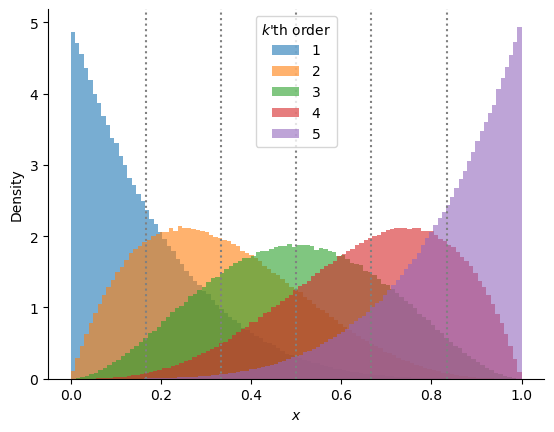

In [71]:
draw(x_sort)


In [111]:
estimate = x_sort[0]
res = sm.OLS(estimate, x_sort.T).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.791e+35
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:39:26   Log-Likelihood:                      3.5078e+07
No. Observations:             1000000   AIC:                                 -7.016e+07
Df Residuals:                  999995   BIC:                                 -7.016e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [112]:
estimate = x_mean_estimate
res = sm.OLS(estimate, x_sort.T).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.631e+36
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:40:24   Log-Likelihood:                      3.5351e+07
No. Observations:             1000000   AIC:                                 -7.070e+07
Df Residuals:                  999995   BIC:                                 -7.070e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 2.2

In [72]:
R = 1000000 # samples
N = 5 # amount of variable

a = 0
sigma = 1

In [73]:
x = np.random.normal(a,b,(N,R))
x_sort = np.sort(x, 0)

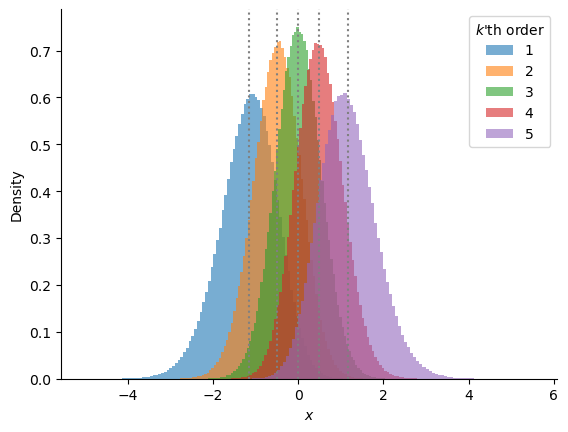

In [74]:
draw(x_sort)

In [113]:
estimate = x_sort[0]
res = sm.OLS(estimate, x_sort.T).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.791e+35
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:41:34   Log-Likelihood:                      3.5078e+07
No. Observations:             1000000   AIC:                                 -7.016e+07
Df Residuals:                  999995   BIC:                                 -7.016e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [114]:
estimate = x_mean_estimate
res = sm.OLS(estimate, x_sort.T).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.631e+36
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:42:28   Log-Likelihood:                      3.5351e+07
No. Observations:             1000000   AIC:                                 -7.070e+07
Df Residuals:                  999995   BIC:                                 -7.070e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 2.3

In [75]:
def draw_for_pois(u : np.array):
    _, ax = plt.subplots()
    
    for k in range(u.shape[0]): 
        mass = pd.DataFrame(np.unique(u[k, :], return_counts=True))
        ax.plot(mass.iloc[1], alpha=0.6, label=f'${k+1}$')
        # ax.hist(, density=True, alpha=0.6, label=f'${k+1}$', bins=100); 
    ax.legend(loc='best', title="$k$'th order")
    sns.despine(); 
    ax.set_xlabel('$x$')
    ax.set_ylabel('CDF'); 
    for k in range(u.shape[0]): 
        ax.axvline(u[k, :].mean(), color='gray', linestyle=':'); 
    plt.show()

In [76]:
R = 1000000 # samples
N = 5 # amount of variable

_lambda = 5

In [79]:
x = np.random.poisson(_lambda,(N,R))
x_sort = np.sort(x, 0)
x_mean_estimate = x.mean(0)

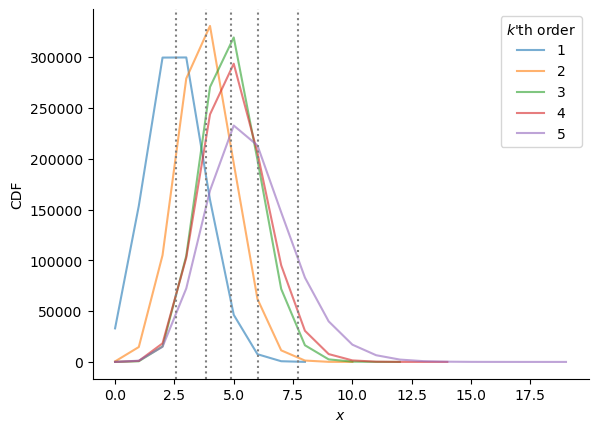

In [78]:
draw_for_pois(x_sort)


In [115]:
estimate = x_sort[0]
res = sm.OLS(estimate, x_sort.T).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.791e+35
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:43:05   Log-Likelihood:                      3.5078e+07
No. Observations:             1000000   AIC:                                 -7.016e+07
Df Residuals:                  999995   BIC:                                 -7.016e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [116]:
estimate = x_mean_estimate
res = sm.OLS(estimate, x_sort.T).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.631e+36
Date:                Wed, 01 Nov 2023   Prob (F-statistic):                        0.00
Time:                        12:43:16   Log-Likelihood:                      3.5351e+07
No. Observations:             1000000   AIC:                                 -7.070e+07
Df Residuals:                  999995   BIC:                                 -7.070e+07
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------